In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import json
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data(file):
    df = pd.read_csv(os.path.join("data", file))
    return df

df = load_data("train.csv")

In [3]:
new_df = load_data("test_data.csv")


In [4]:
new_df.dtypes

observation_id                   object
Type                             object
Date                             object
Part of a policing operation       bool
Latitude                        float64
Longitude                       float64
Gender                           object
Age range                        object
Officer-defined ethnicity        object
Legislation                      object
Object of search                 object
station                          object
Outcome                            bool
Predicted outcome                  bool
dtype: object

In [11]:
new_df.isna().sum()

observation_id                     0
Type                               0
Date                               0
Part of a policing operation       0
Latitude                        1181
Longitude                       1181
Gender                             0
Age range                          0
Officer-defined ethnicity          0
Legislation                        0
Object of search                   0
station                            0
Outcome                            0
Predicted outcome                  0
dtype: int64

In [20]:
new_df['Legislation'].unique()

array(['Police and Criminal Evidence Act 1984 (section 1)',
       'Misuse of Drugs Act 1971 (section 23)',
       'Poaching Prevention Act 1862 (section 2)',
       'Criminal Justice and Public Order Act 1994 (section 60)',
       'Criminal Justice Act 1988 (section 139B)',
       'Firearms Act 1968 (section 47)',
       'Psychoactive Substances Act 2016 (s36(2))'], dtype=object)

In [5]:
def clean(df):


    df = df.drop(df[df['station'].isin(["leicestershire",'humberside', 'lancashire','metropolitan','west-midlands'])].index)
    
    df['Part of a policing operation'] = df['Part of a policing operation'].fillna(False)
    df['Part of a policing operation'] = df['Part of a policing operation'].astype(bool)

    df['Outcome linked to object of search'] = df['Outcome linked to object of search'].fillna(False)

    df['Legislation'] = df['Legislation'].fillna('unknown')
    
    df.loc[df['Outcome'] == 'A no further action disposal', 'Outcome linked to object of search'] = False
    
    success_outcomes = ['Community resolution', 'Khat or Cannabis warning', 'Caution (simple or conditional)', 
                    'Arrest', 'Penalty Notice for Disorder', 'Summons / charged by post', 
                    'Suspect arrested', 'Suspect summoned to court']

    df['success'] = df.apply(lambda x: True if x['Outcome'] in success_outcomes and x['Outcome linked to object of search'] == True else False, axis=1)


    #df=df.dropna()
    return df

df = clean(df)

In [6]:
class DateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Date'] = pd.to_datetime(X['Date'])
        X['Hour'] = X['Date'].dt.hour
        X['Month'] = X['Date'].dt.month
        X['Day'] = X['Date'].dt.day
        X['DayOfWeek'] = X['Date'].dt.weekday
        X=X.drop(columns = "Date", axis=1)
        
        return X[['Hour','Month', 'Day', 'DayOfWeek']]

    def get_feature_names_out(self):
        return [('Date', 'Hour'), ('Date', 'Month'), ('Date', 'Day'),('Date', 'DayOfWeek')]


Number of stations in df: 36
Number of stations in new_df: 6


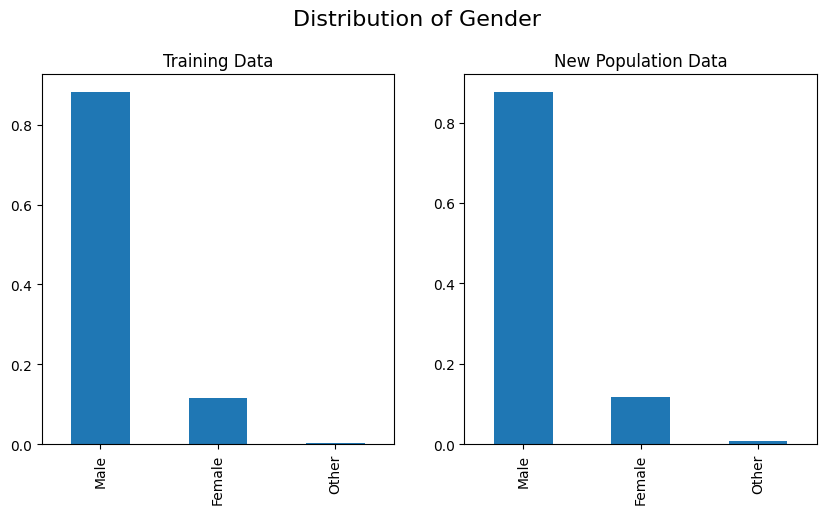

Percentage change in value counts for Gender:
Male       -0.676746
Female      1.112185
Other     264.097450
Name: Gender, dtype: float64


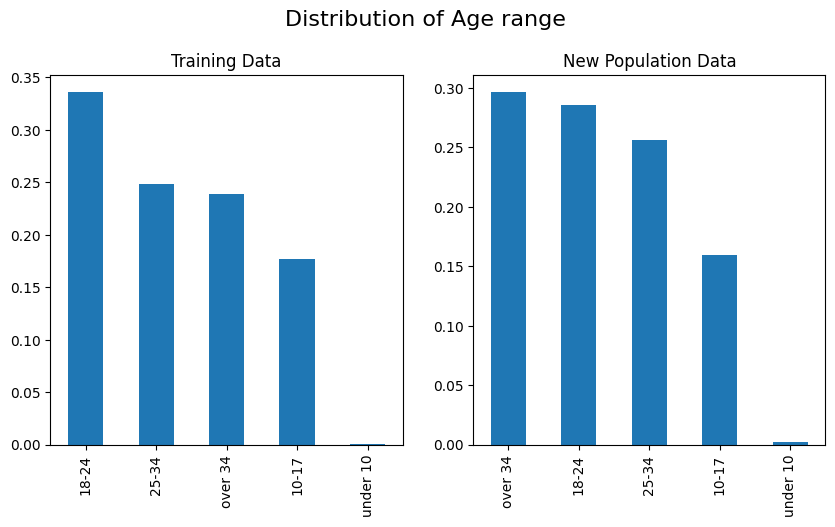

Percentage change in value counts for Age range:
10-17        -9.645769
18-24       -14.856676
25-34         3.111088
over 34      24.313610
under 10    155.795426
Name: Age range, dtype: float64


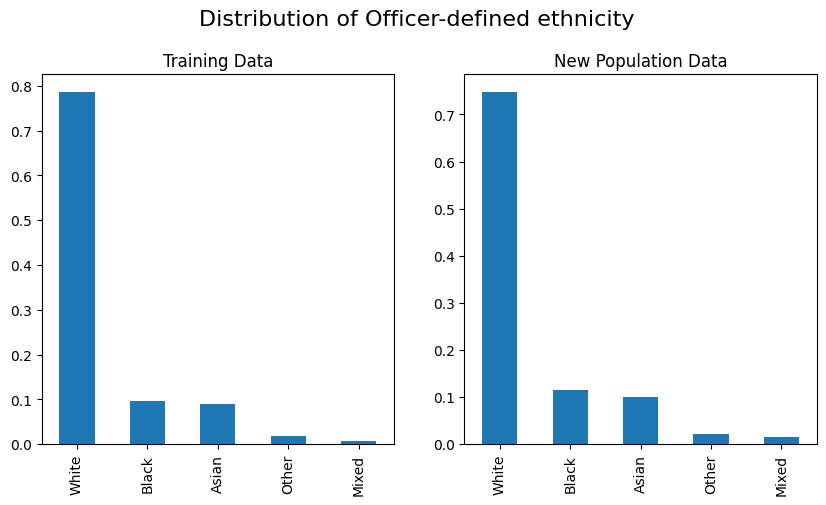

Percentage change in value counts for Officer-defined ethnicity:
White    -4.860634
Black    20.746888
Asian    10.768824
Other    12.733077
Mixed    76.472216
Name: Officer-defined ethnicity, dtype: float64


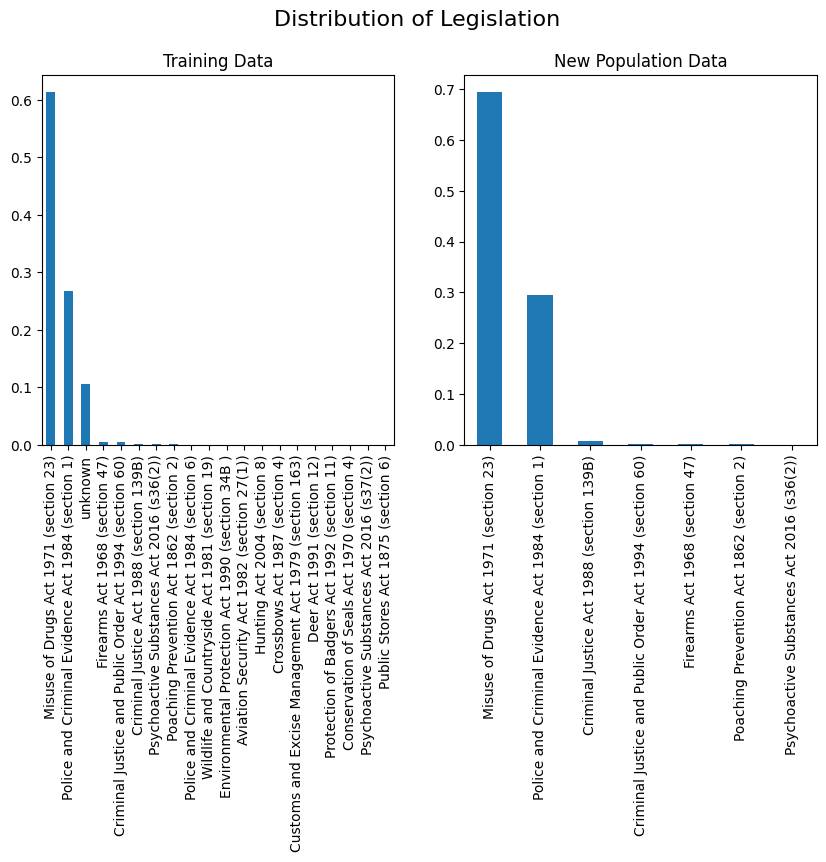

Percentage change in value counts for Legislation:
Aviation Security Act 1982 (section 27(1))                        NaN
Conservation of Seals Act 1970 (section 4)                        NaN
Criminal Justice Act 1988 (section 139B)                   349.411797
Criminal Justice and Public Order Act 1994 (section 60)    -61.327111
Crossbows Act 1987 (section 4)                                    NaN
Customs and Excise Management Act 1979 (section 163)              NaN
Deer Act 1991 (section 12)                                        NaN
Environmental Protection Act 1990 (section 34B )                  NaN
Firearms Act 1968 (section 47)                             -67.226611
Hunting Act 2004 (section 8)                                      NaN
Misuse of Drugs Act 1971 (section 23)                       13.270134
Poaching Prevention Act 1862 (section 2)                    34.604992
Police and Criminal Evidence Act 1984 (section 1)           10.227609
Police and Criminal Evidence Act 1984 (

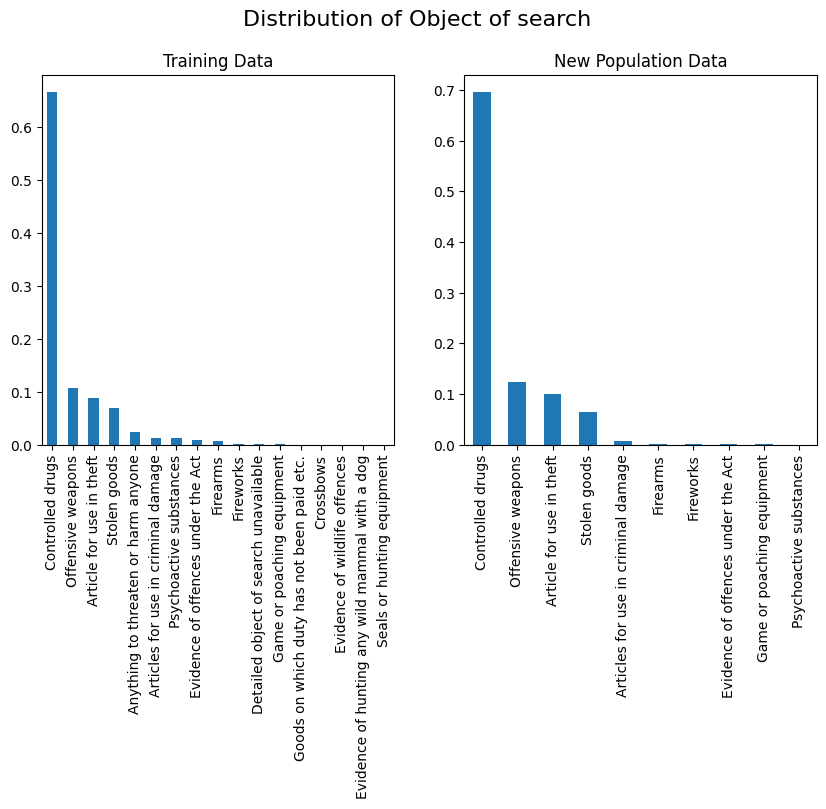

Percentage change in value counts for Object of search:
Anything to threaten or harm anyone                     NaN
Article for use in theft                          14.492616
Articles for use in criminal damage              -46.465672
Controlled drugs                                   4.389892
Crossbows                                               NaN
Detailed object of search unavailable                   NaN
Evidence of hunting any wild mammal with a dog          NaN
Evidence of offences under the Act               -85.622303
Evidence of wildlife offences                           NaN
Firearms                                         -66.636369
Fireworks                                          8.463183
Game or poaching equipment                        79.473323
Goods on which duty has not been paid etc.              NaN
Offensive weapons                                 16.705314
Psychoactive substances                          -98.036364
Seals or hunting equipment                  

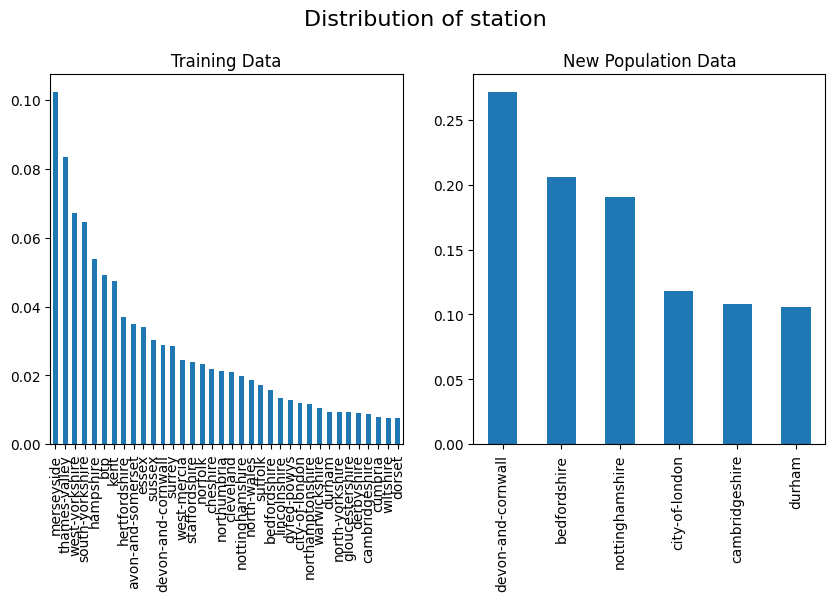

Percentage change in value counts for station:
avon-and-somerset             NaN
bedfordshire          1212.289240
btp                           NaN
cambridgeshire        1110.365532
cheshire                      NaN
city-of-london         882.465202
cleveland                     NaN
cumbria                       NaN
derbyshire                    NaN
devon-and-cornwall     837.194356
dorset                        NaN
durham                1010.631987
dyfed-powys                   NaN
essex                         NaN
gloucestershire               NaN
hampshire                     NaN
hertfordshire                 NaN
kent                          NaN
lincolnshire                  NaN
merseyside                    NaN
norfolk                       NaN
north-wales                   NaN
north-yorkshire               NaN
northamptonshire              NaN
northumbria                   NaN
nottinghamshire        853.911567
south-yorkshire               NaN
staffordshire                 NaN
s

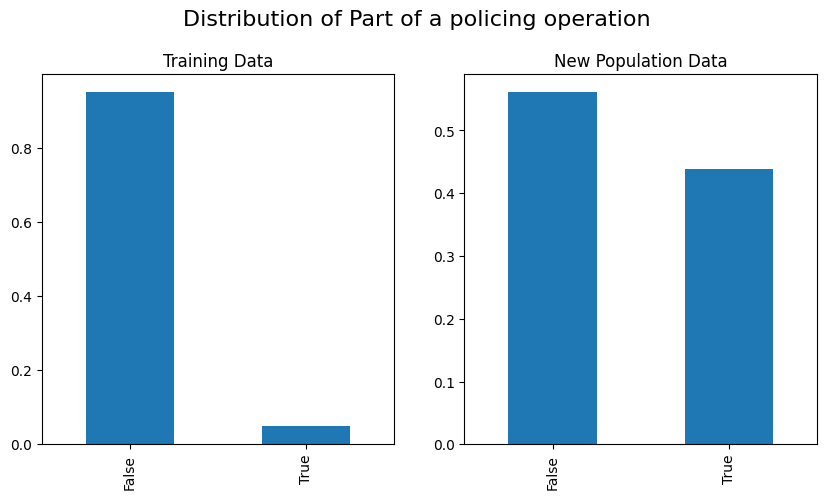

Percentage change in value counts for Part of a policing operation:
False    -40.986109
True     794.653918
Name: Part of a policing operation, dtype: float64


In [9]:
stations_df = df['station'].unique()
stations_new_df = new_df['station'].unique()

print(f"Number of stations in df: {len(stations_df)}")
print(f"Number of stations in new_df: {len(stations_new_df)}")

columns_to_compare = ['Gender', 'Age range', 'Officer-defined ethnicity', 'Legislation', 'Object of search','station','Part of a policing operation']

for column in columns_to_compare:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'Distribution of {column}', fontsize=16)
    fig.subplots_adjust(top=0.85)
    ax[0].set_title(f"Training Data")
    ax[1].set_title(f"New Population Data")
    df[column].value_counts(normalize=True).plot(kind='bar', ax=ax[0])
    new_df[column].value_counts(normalize=True).plot(kind='bar', ax=ax[1])
    plt.show()

    
    value_counts_df = df[column].value_counts(normalize=True)
    value_counts_new_df = new_df[column].value_counts(normalize=True)
    percentage_change = ((value_counts_new_df - value_counts_df) / value_counts_df) * 100
    print(f"Percentage change in value counts for {column}:")
    print(percentage_change)



/tmp/ipykernel_73/195246065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])


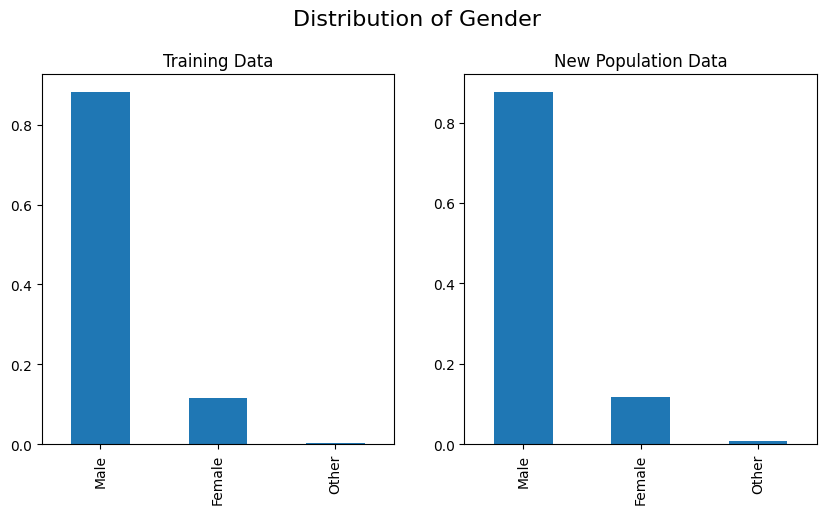

Percentage change in value counts for Gender:
Male      0.103089
Female   -0.241841
Other    -8.750000
Name: Gender, dtype: float64


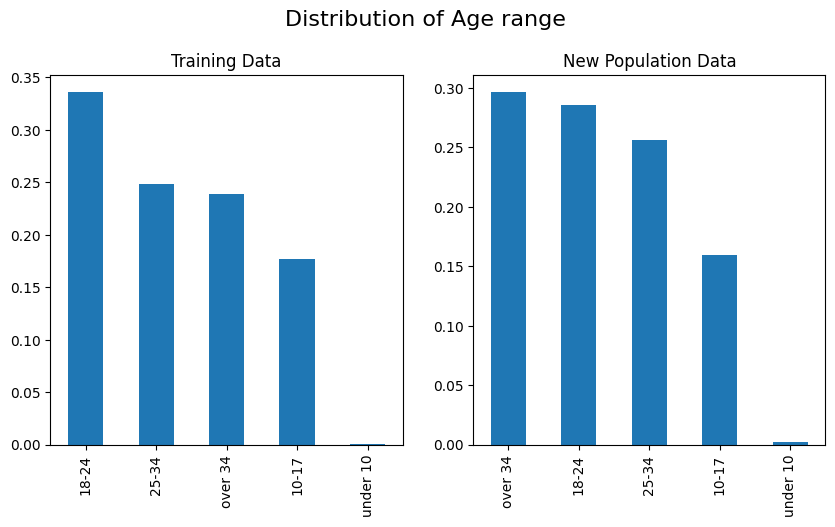

Percentage change in value counts for Age range:
10-17        5.723000
18-24      -13.152827
25-34       -3.260925
over 34     17.079181
under 10     4.285714
Name: Age range, dtype: float64


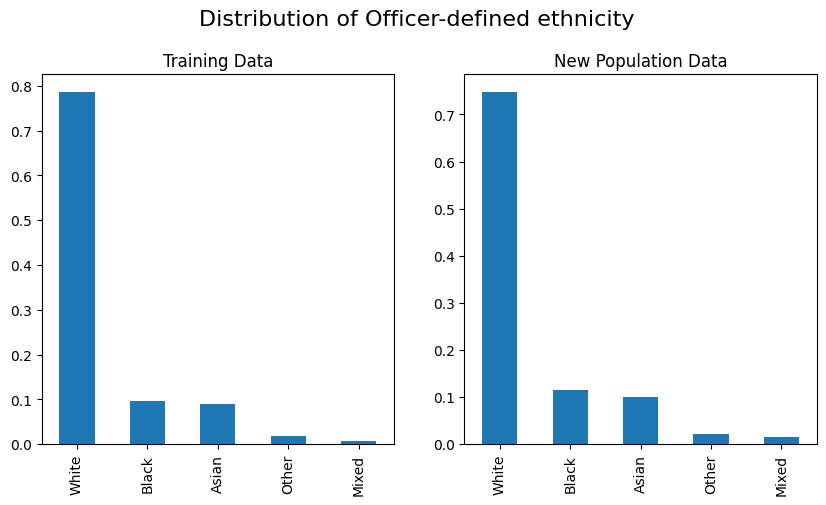

Percentage change in value counts for Officer-defined ethnicity:
Asian   -10.311736
Black     5.253713
Mixed     2.995050
Other    24.042969
White     0.147770
Name: Officer-defined ethnicity, dtype: float64


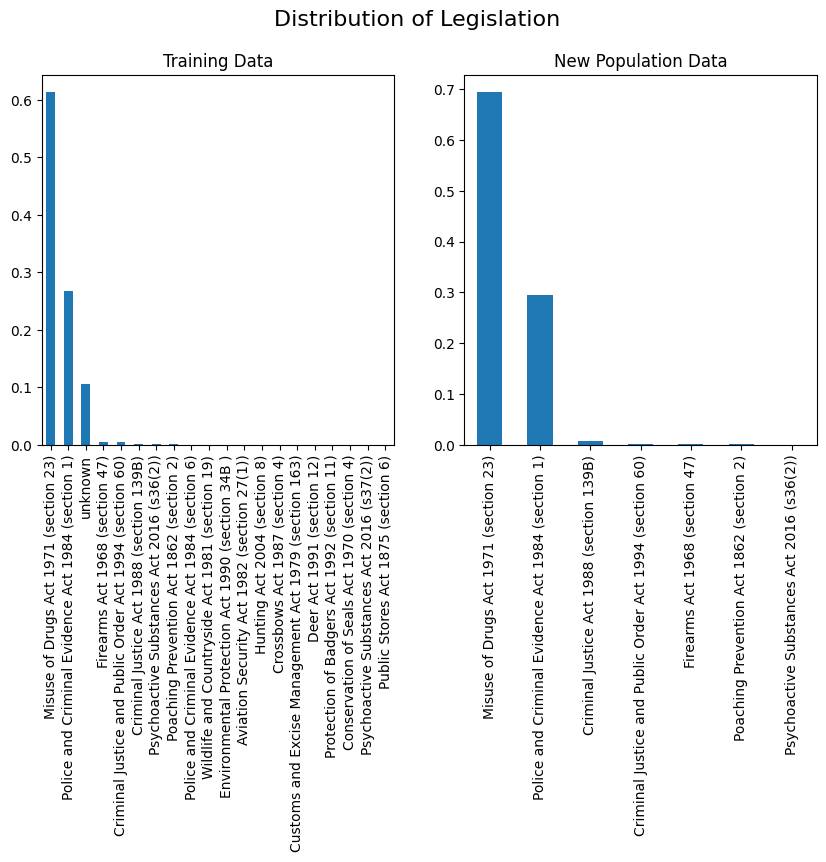

Percentage change in value counts for Legislation:
Conservation of Seals Act 1970 (section 4)                        NaN
Criminal Justice Act 1988 (section 139B)                    14.337349
Criminal Justice and Public Order Act 1994 (section 60)    224.444444
Deer Act 1991 (section 12)                                        NaN
Firearms Act 1968 (section 47)                             -44.456522
Hunting Act 2004 (section 8)                                      NaN
Misuse of Drugs Act 1971 (section 23)                       -3.430183
Poaching Prevention Act 1862 (section 2)                    65.909091
Police and Criminal Evidence Act 1984 (section 1)            8.919465
Psychoactive Substances Act 2016 (s36(2))                         NaN
unknown                                                           NaN
Name: Legislation, dtype: float64


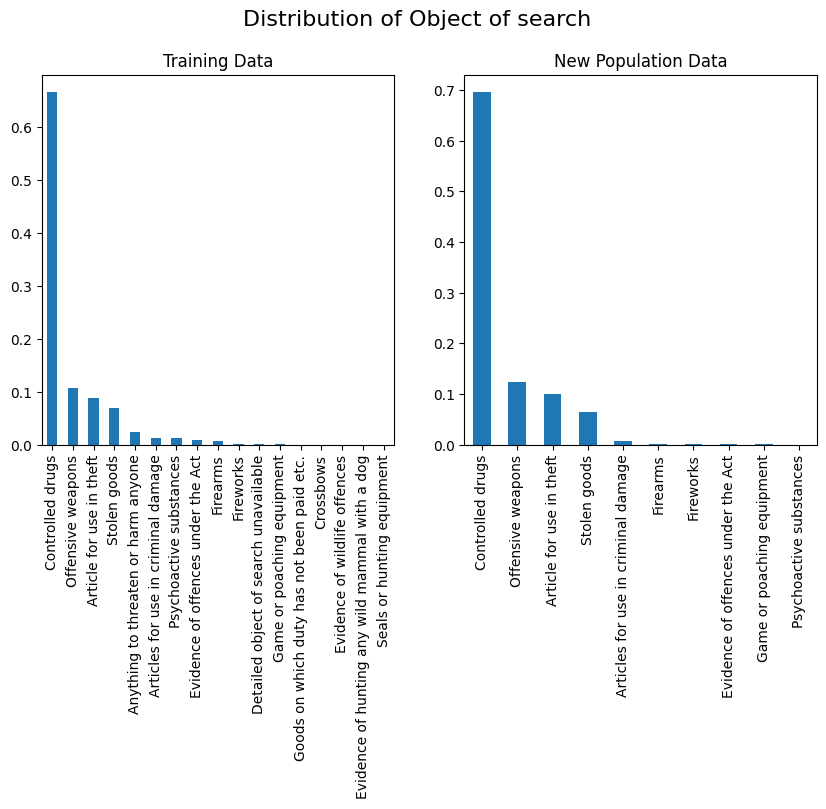

Percentage change in value counts for Object of search:
Article for use in theft                            14.559969
Articles for use in criminal damage                 -7.090909
Controlled drugs                                    -3.431113
Evidence of hunting any wild mammal with a dog            NaN
Evidence of offences under the Act                 -46.323529
Firearms                                           -34.821429
Fireworks                                         1360.000000
Game or poaching equipment                          65.909091
Offensive weapons                                   22.071952
Psychoactive substances                             82.500000
Seals or hunting equipment                                NaN
Stolen goods                                       -12.666667
Name: Object of search, dtype: float64


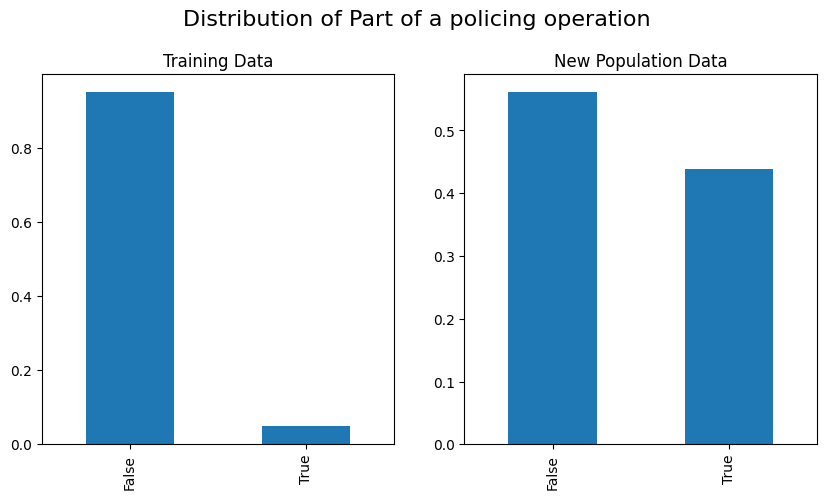

Percentage change in value counts for Part of a policing operation:
False    -36.276118
True     267.709880
Name: Part of a policing operation, dtype: float64


In [10]:
stations_new_df = new_df['station'].unique()
df_filtered = df[df['station'].isin(stations_new_df)]

months_new_df = pd.to_datetime(new_df['Date']).dt.month.unique()
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered = df_filtered[df_filtered['Date'].dt.month.isin(months_new_df)]

columns_to_compare = ['Gender', 'Age range', 'Officer-defined ethnicity', 'Legislation', 'Object of search','Part of a policing operation']

for column in columns_to_compare:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'Distribution of {column}', fontsize=16)
    fig.subplots_adjust(top=0.85)
    ax[0].set_title(f"Training Data")
    ax[1].set_title(f"New Population Data")
    df[column].value_counts(normalize=True).plot(kind='bar', ax=ax[0])
    new_df[column].value_counts(normalize=True).plot(kind='bar', ax=ax[1])
    plt.show()
    
    value_counts_df = df_filtered[column].value_counts(normalize=True)
    value_counts_new_df = new_df[column].value_counts(normalize=True)
    percentage_change = ((value_counts_new_df - value_counts_df) / value_counts_df) * 100
    print(f"Percentage change in value counts for {column}:")
    print(percentage_change)
  
    
    